# Logistic Regression

In this project, we will implement logistic regression and apply it to two different datasets. 


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Logistic Regression](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Loading and visualizing the data](#2.2)
  - [ 2.3  Sigmoid function](#2.3)
  - [ 2.4 Cost function for logistic regression](#2.4)
  - [ 2.5 Gradient for logistic regression](#2.5)
  - [ 2.6 Learning parameters using gradient descent ](#2.6)
  - [ 2.7 Plotting the decision boundary](#2.7)
  - [ 2.8 Evaluating logistic regression](#2.8)
- [ 3 - Regularized Logistic Regression](#3)
  - [ 3.1 Problem Statement](#3.1)
  - [ 3.2 Loading and visualizing the data](#3.2)
  - [ 3.3 Feature mapping](#3.3)
  - [ 3.4 Cost function for regularized logistic regression](#3.4)
  - [ 3.5 Gradient for regularized logistic regression](#3.5)
  - [ 3.6 Learning parameters using gradient descent](#3.6)
  - [ 3.7 Plotting the decision boundary](#3.7)
  - [ 3.8 Evaluating regularized logistic regression model](#3.8)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that we will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
-  ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
import sys
import os
from pathlib import Path

%matplotlib inline

In [2]:
# Add src to the path
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
src_path = project_root / 'src'
sys.path.insert(0, str(src_path))

# Set data path
data_path = project_root / 'data' / 'raw' / 'ex2data1.txt'

<a name="2"></a>
## 2 - Logistic Regression

In this part of the projecy, we will build a logistic regression model to predict whether a student gets admitted into a university.

<a name="2.1"></a>
### 2.1 Problem Statement

This project could be used by the administrators of a university department and who wants to determine each applicant’s chance of admission based on their results on two exams. 
* We have historical data from previous applicants that we can use as a training set for logistic regression. 
* For each training example, we have the applicant’s scores on two exams and the admissions decision. 
* Our task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

<a name="2.2"></a>
### 2.2 Loading and visualizing the data

We will start by loading the dataset for this task. 
- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains exam scores on two exams for a student
  - `y_train` is the admission decision 
      - `y_train = 1` if the student was admitted 
      - `y_train = 0` if the student was not admitted 
  - Both `X_train` and `y_train` are numpy arrays.


In [3]:

# Load data using the correct path
data = pd.read_csv(data_path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
# Extract features and target 3.1
X = data[['Exam 1', 'Exam 2']].values
y = data['Admitted'].values

# Since we are not splitting, we use the entire dataset as training
X_train = X
y_train = y

#### View the variables
Let's get more familiar with our dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the first five values of `X_train` and the type of the variable.

In [5]:

print("First five elements in X_train are:\n", X[:5])
print("Type of X_train:",type(X))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


Now print the first five values of `y_train`

In [6]:
print("First five elements in y_train are:\n", y[:5])
print("Type of y_train:",type(y))

First five elements in y_train are:
 [0 0 0 1 1]
Type of y_train: <class 'numpy.ndarray'>


#### Let's check the dimensions of variables

Another useful way to get familiar with our data is to view its dimensions. Let's print the shape of `X_train` and `y_train` and see how many training examples we have in our dataset.

In [7]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))
print ('We have m = %d training examples' % (len(y)))

The shape of X is: (100, 2)
The shape of y is: (100,)
We have m = 100 training examples


#### Let's visualize our data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.
- The code below displays the data on a 2D plot (as shown below), where the axes are the two exam scores, and the positive and negative examples are shown with different markers.
- We use a helper function in the ``utils.py`` file to generate this plot. 

<img src="images/figure 1.png" width="450" height="450">



In [8]:
# Add this before the plot_data function call
print(f"X shape: {X.shape if 'X' in locals() else 'X not defined'}")
print(f"y shape: {y.shape if 'y' in locals() else 'y not defined'}")

X shape: (100, 2)
y shape: (100,)


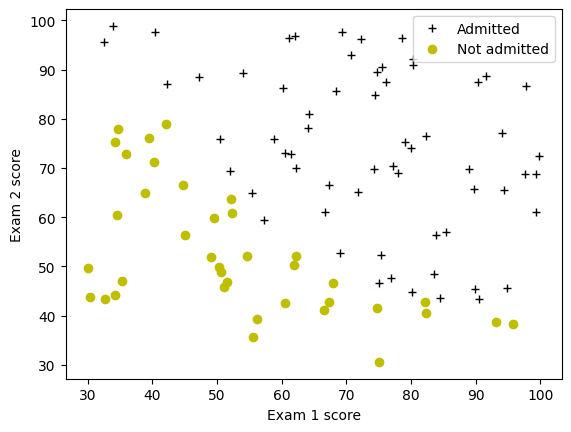

In [9]:
#5.1
# Define plot_data function
def plot_data(X, y, pos_label="Admitted", neg_label="Not admitted"):
    """
    Plot data points with different markers for positive/negative examples
    
    Args:
        X : (ndarray Shape (m,n)) data, m examples by n features
        y : (ndarray Shape (m,))  target value 
        pos_label : (str) Label for positive examples
        neg_label : (str) Label for negative examples
    """
    # Find indices of positive and negative examples
    pos = y == 1
    neg = y == 0
    
    # Plot examples with labels
    plt.plot(X[pos, 0], X[pos, 1], 'k+', label=pos_label)
    plt.plot(X[neg, 0], X[neg, 1], 'yo', label=neg_label)

# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

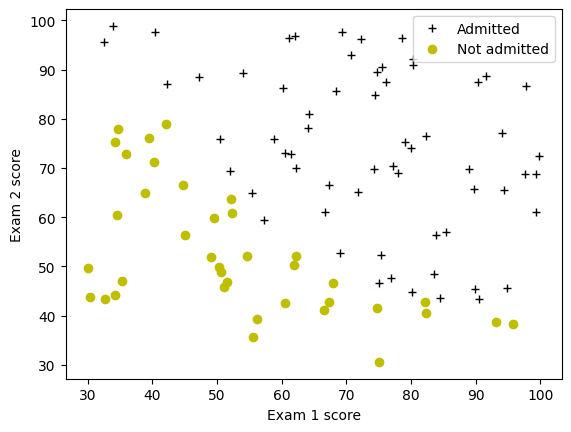

In [10]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

Our goal is to build a logistic regression model to fit this data.
- With this model, we can then predict if a new student will be admitted based on their scores on the two exams.

<a name="2.3"></a>
### 2.3  Sigmoid function

For logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.

<a name='ex-01'></a>
### Exercise 1
Please complete  the `sigmoid` function to calculate

$$g(z) = \frac{1}{1+e^{-z}}$$

Note that 
- `z` is not always a single number, but can also be an array of numbers. 
- If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.

In [11]:

# FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
 
    g=1/(1+np.exp(-z))
    
    return g

When we are finished, we should try testing a few values by calling `sigmoid(x)` in the cell below. 
- For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. 
- Evaluating `sigmoid(0)` should give us exactly 0.5. 


In [12]:
# Note: We can edit this value
value = 0.01

print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0.01) = 0.5024999791668749


**Expected Output**:
<table>
  <tr>
    <td> <b>sigmoid(0)<b></td>
    <td> 0.5 </td> 
  </tr>
</table>
    
- As mentioned before, our code should also work with vectors and matrices. 
For a matrix, our function should perform the sigmoid function on every element.

<a name="2.4"></a>
### 2.4 Cost function for logistic regression

In this section, we will implement the cost function for logistic regression.

<a name='ex-02'></a>
### Section 2

We will complete the `compute_cost` function using the equations below.

For logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Note:
* As you are doing this, remember that the variables `X_train` and `y_train` are not scalar values but matrices of shape ($m, n$) and ($𝑚$,1) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.
* We can use the sigmoid function that we implemented above for this part.

In [13]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost 
    """
    m, n = X.shape
    
    """
        It might be helpful to first calculate an intermediate variable  𝑧𝐰,𝑏(𝐱(𝑖))=𝐰⋅𝐱(𝐢)+𝑏=𝑤0𝑥(𝑖)0+...+𝑤𝑛−1𝑥(𝑖)𝑛−1+𝑏
  where  𝑛
  is the number of features, before calculating  𝑓𝐰,𝑏(𝐱(𝑖))=𝑔(𝑧𝐰,𝑏(𝐱(𝑖)))
    """  
    loss_sum=0
    for i in range (m):
      z_wb=0
      for j in range(n):
        z_wb_ij=w[j]*X[i][j]  #w[j] * X[i][j]
        z_wb=z_wb+z_wb_ij
      z_wb+= b
      f_wb=sigmoid(z_wb)
                #𝑙𝑜𝑠𝑠(𝑓𝐰,𝑏(𝐱(𝑖)),𝑦(𝑖))=(−𝑦(𝑖)log(𝑓𝐰,𝑏(𝐱(𝑖)))−(1−𝑦(𝑖))log(1−𝑓𝐰,𝑏(𝐱(𝑖)))
      loss =  -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
      loss_sum+=loss
            
        
    total_cost = (1 / m) * loss_sum  

    return total_cost

Run the cells below to check your implementation of the `compute_cost` function with two different initializations of the parameters $w$ and $b$

In [14]:
m, n = X.shape
# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X, y, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w and b (zeros)<b></td>
    <td> 0.693 </td> 
  </tr>
</table>

In [15]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))

Cost at test w and b (non-zeros): 0.179


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at test w and b (non-zeros):<b></td>
    <td> 0.218 </td> 
  </tr>
</table>

<a name="2.5"></a>
### 2.5 Gradient for logistic regression

In this section, we will implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously


<a name='ex-03'></a>
### Section 3

We will complete the `compute_gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


- **Note**: While this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $f_{\mathbf{w},b}(x)$.

As before, we can use the sigmoid function that we implemented above.  

In [16]:
# FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    
    for i in range(m):   
        # Calculate f_wb (exactly how we did it in the compute_cost function above)
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij
        # Add bias term 
        z_wb += b

         # Calculate the prediction from the model
        f_wb = sigmoid(z_wb)
    # Calculate the  gradient for b from this example
        dj_db_i = f_wb - y[i]    # Our code here to calculate the error

    # add that to dj_db
        dj_db += dj_db_i 
    
    # get dj_dw for each attribute
        for j in range(n):
            dj_dw_ij = (f_wb - y[i])* X[i][j]
            dj_dw[j] += dj_dw_ij   
                            
    dj_dw = dj_dw / m
    dj_db = dj_db / m
       
    return dj_db, dj_dw

We will run the cells below to check our implementation of the `compute_gradient` function with two different initializations of the parameters $w$ and $b$

In [17]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
dj_db, dj_dw = compute_gradient(X, y, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.12
dj_dw at initial w and b (zeros):[-12.67414359204539, -12.971336082941848]


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at initial w and b (zeros)<b></td>
    <td> -0.1 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw at initial w and b (zeros):<b></td>
    <td> [-12.00921658929115, -11.262842205513591] </td> 
  </tr>
</table>

In [18]:
# We will compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

dj_db at test w and b: -0.6199999999991072
dj_dw at test w and b: [-45.49628062064877, -45.8511026114571]


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at test w and b (non-zeros)<b></td>
    <td> -0.5999999999991071 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw at test w and b (non-zeros):<b></td>
    <td>  [-44.8313536178737957, -44.37384124953978] </td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Learning parameters using gradient descent 

Similar to the previous assignment, we will now find the optimal parameters of a logistic regression model by using gradient descent. 
- We don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(\mathbf{w},b)$ and check that it is decreasing with each step. 

- Assuming we have implemented the gradient and computed the cost correctly, our value of $J(\mathbf{w},b)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [19]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

**Note**
The code block below takes a couple of minutes to run, especially with a non-vectorized version. We can reduce the `iterations` to test our implementation and iterate faster. If we have time later, we could try running 100,000 iterations for better results.

In [20]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8
# Some gradient descent settings
iterations = 10000
alpha = 0.001
w,b, J_history,_ = gradient_descent(X, y, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.95   
Iteration 1000: Cost     0.29   
Iteration 2000: Cost     0.29   
Iteration 3000: Cost     0.29   
Iteration 4000: Cost     0.29   
Iteration 5000: Cost     0.29   
Iteration 6000: Cost     0.29   
Iteration 7000: Cost     0.29   
Iteration 8000: Cost     0.29   
Iteration 9000: Cost     0.29   
Iteration 9999: Cost     0.29   


<details>
<summary>
    <b>Expected Output: Cost     0.30, (Click to see details):</b>
</summary>

    # With the following settings
    np.random.seed(1)
    initial_w = 0.01 * (np.random.rand(2) - 0.5)
    initial_b = -8
    iterations = 10000
    alpha = 0.001
    #

```
Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   
```

<a name="2.7"></a>
### 2.7 Plotting the decision boundary

We will now use the final parameters from gradient descent to plot the linear fit. If we implemented the previous parts correctly, we should see a plot similar to the following plot:   
<img src="images/figure 2.png"  width="450" height="450">

We will use a helper function in the `utils.py` file to create this plot.

NameError: name 'predict' is not defined

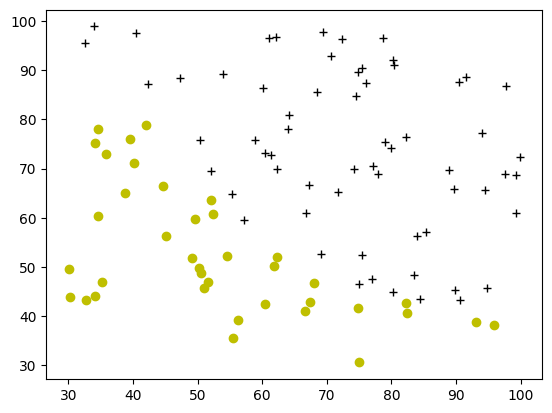

In [21]:
#17.1
# Define plot_decision_boundary function
def plot_decision_boundary(w, b, X, y):
    """
    Plot the decision boundary for logistic regression
    
    Args:
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      X : (ndarray Shape (m, n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
    """
    # Plot the original data
    plot_data(X, y)
    
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Flatten the grid and create a feature matrix
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict the probability for each point in the grid
    Z = predict(grid_points, w, b)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour
    contour = plt.contour(xx, yy, Z, levels=[0.5], colors='g')
    plt.clabel(contour, inline=True, fontsize=10, fmt='Decision Boundary')
    
    # Set the y-axis label
    plt.ylabel('Exam 2 score') 
    # Set the x-axis label
    plt.xlabel('Exam 1 score') 
    plt.legend(loc="upper right")
    plt.show()

# Plot decision boundary
plot_decision_boundary(w, b, X, y)

In [ ]:
plot_decision_boundary(w, b, X_train, y_train)
# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

<a name="2.8"></a>
### 2.8 Evaluating logistic regression

We can evaluate the quality of the parameters we have found by seeing how well the learned model predicts on our training set. 

We will implement the `predict` function below to do this.

<a name='ex-04'></a>
### Section 4

We will complete the `predict` function to produce `1` or `0` predictions given a dataset and a learned parameter vector $w$ and $b$.
- First we need to compute the prediction from the model $f(x^{(i)}) = g(w \cdot x^{(i)} + b)$ for every example 
    - We've implemented this before in the parts above
- We interpret the output of the model ($f(x^{(i)})$) as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by $w$.
- Therefore, to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, we can use the following heuristic -

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$
    

In [22]:

# FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    # Loop over each example
    for i in range(m):           
        z_wb=0
        for j in range(n):
            z_wb_ij=w[j]*X[i][j]  #w[j] * X[i][j]
            z_wb=z_wb+z_wb_ij
        z_wb+= b
        f_wb=sigmoid(z_wb)
        # Loop over each feature
        
        # Apply the threshold
        """if f_wb>=0.5: 
            p[i] = 1 
        else:
            p[i] = 1 
        """
        p[i] = f_wb >= 0.5
 
    return p

Once we have completed the function `predict`, let's run the code below to report the training accuracy of our classifier by computing the percentage of examples it got correct.

In [23]:
# Test our predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')


Output of predict: shape (4,), value [0. 1. 1. 1.]


**Expected output** 

<table>
  <tr>
    <td> <b>Output of predict: shape (4,),value [0. 1. 1. 1.]<b></td>
  </tr>
</table>

Now let's use this to compute the accuracy on the training set

In [24]:
#Compute accuracy on our training set
p = predict(X, w, b)
print('Train Accuracy: %f'%(np.mean(p == y) * 100))

Train Accuracy: 93.000000


<table>
  <tr>
    <td> <b>Train Accuracy (approx):<b></td>
    <td> 92.00 </td> 
  </tr>
</table>